# Cavity detection and characterization of ALDHs

Members of the aldehyde dehydrogenase (ALDHs) superfamily have unique characteristics at their substrate binding site, where they catalyze the NAD+-dependent oxidation of aldehydes to their respective carboxylic acids.

Here, we explore the crystallographic structures and molecular dynamics of ALDH1A2 (RALDH2) and ALDH2, focusing on the substrate binding sites.

In [1]:
import os
import numpy
import toml
import pandas
import nglview
import pyKVFinder
import KVFinderMD
import matplotlib.pyplot as plt

In [2]:
os.makedirs("results/ALDH", exist_ok=True)
os.makedirs("pymol/ALDH", exist_ok=True)

## ALDH1A2 substrate binding site

- 6B5G: ALDH1A2 liganded with NAD and (3-ethoxythiophen-2-yl){4-[4-nitro-3-(pyrrolidin-1-yl)phenyl]piperazin-1-yl}methanone (compound 6-118)

Reference: https://www.rcsb.org/structure/6B5G

In [3]:
# Detect and characterize cavities
atomic = pyKVFinder.read_pdb("data/6B5G.pdb")
latomic = pyKVFinder.read_pdb("data/reference.pdb")
vertices = pyKVFinder.get_vertices(atomic, probe_out=8.0)
ncav, cavities = pyKVFinder.detect(atomic, vertices, probe_out=8.0, latomic=latomic)
surface, volume, area = pyKVFinder.spatial(cavities)
depth, max_depth, avg_depth = pyKVFinder.depth(cavities)

# Exclude cavities
all_cavities = numpy.unique(cavities[cavities > 1])
selected_cavities = numpy.unique(cavities[depth > 8])
excluded_cavities = list(set(all_cavities) - set(selected_cavities))

for cav in excluded_cavities:
    cavities[cavities == cav] = -1

# Export cavities
pyKVFinder.export(
    "results/ALDH/6B5G.KVFinder.output.pdb",
    cavities,
    surface,
    vertices,
    B=depth
)

# Export results
pyKVFinder.write_results(
    "results/ALDH/6B5G.KVFinder.results.toml",
    input="data/6B5G.pdb",
    ligand=None,
    output="results/ALDH/6B5G.KVFinder.output.pdb",
    volume=volume,
    area=area,
    avg_depth=avg_depth,
    max_depth=max_depth
)

In [4]:
# Visualize ALDH1A2 cavity points (rainbow scale)

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Display receptor
pdb = view.add_component('data/6B5G.pdb')
pdb.clear()
pdb.add_cartoon(color='gray')

# Display ligand
pdb = view.add_component('data/reference.pdb')
pdb.clear()
pdb.add_cartoon(color='red')

# Display cavity
cavs = view.add_component('results/ALDH/6B5G.KVFinder.output.pdb')
cavs.clear()
cavs.add_point(colorScheme='bfactor', colorScale='rainbow', colorReverse=True)

# Display on NGL viewer
view

NGLWidget()

## ALDH2 substrate binding site

- 5L13: Structure of ALDH2 in complex with 2P3

Reference: https://www.rcsb.org/structure/5L13

In [5]:
# Detect and characterize cavities
atomic = pyKVFinder.read_pdb("data/5L13.pdb")
latomic = pyKVFinder.read_pdb("data/reference.pdb")
vertices = pyKVFinder.get_vertices(atomic, probe_out=8.0)
ncav, cavities = pyKVFinder.detect(atomic, vertices, probe_out=8.0, latomic=latomic)
surface, volume, area = pyKVFinder.spatial(cavities)
depth, max_depth, avg_depth = pyKVFinder.depth(cavities)

# Exclude cavities
all_cavities = numpy.unique(cavities[cavities > 1])
selected_cavities = numpy.unique(cavities[depth > 10])
excluded_cavities = list(set(all_cavities) - set(selected_cavities))

for cav in excluded_cavities:
    cavities[cavities == cav] = -1

# Export cavities
pyKVFinder.export(
    "results/ALDH/5L13.KVFinder.output.pdb",
    cavities,
    surface,
    vertices,
    B=depth
)

# Export results
pyKVFinder.write_results(
    "results/ALDH/5L13.KVFinder.results.toml",
    input="data/5L13.pdb",
    ligand=None,
    output="results/ALDH/5L13.KVFinder.output.pdb",
    volume=volume,
    area=area,
    avg_depth=avg_depth,
    max_depth=max_depth
)

In [6]:
# Visualize ALDH2 cavity points (rainbow scale)

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Display receptor
pdb = view.add_component('data/5L13.pdb')
pdb.clear()
pdb.add_cartoon(color='gray')

# Display ligand
pdb = view.add_component('data/reference.pdb')
pdb.clear()
pdb.add_cartoon(color='red')

# Display cavity
cavs = view.add_component('results/ALDH/5L13.KVFinder.output.pdb')
cavs.clear()
cavs.add_point(colorScheme='bfactor', colorScale='rainbow', colorReverse=True)

# Display on NGL viewer
view

NGLWidget()

### Cavity visualization

In [7]:
# PyMOL v2.5.0: Visualize ALDH1A2 and ALDH2
with open("pymol/ALDH/visualize-structures.py", "w") as f:
    f.write("""import pymol
from pymol import cmd, stored

# Launch pymol
pymol.finish_launching(['pymol', '-q'])

# ALDH1A2
cmd.load("data/6B5G.pdb")
cmd.load("results/ALDH/6B5G.KVFinder.output.pdb")

# ALDH2
cmd.load("data/5L13.pdb")
cmd.load("results/ALDH/5L13.KVFinder.output.pdb")

# Spectrum b
stored.b = []
cmd.iterate("(obj 5L13.KVFinder.output or 6B5G.KVFinder.output)", "stored.b.append(b)")
cmd.spectrum("b", "rainbow", "5L13.KVFinder.output", [0.0, max(stored.b)])
cmd.spectrum("b", "rainbow", "6B5G.KVFinder.output", [0.0, max(stored.b)])
cmd.ramp_new("Depth", "5L13.KVFinder.output", [0.0, max(stored.b)], ["blue", "white", "red"])

# How to display cavities
cmd.hide("everything", "5L13.KVFinder.output or 6B5G.KVFinder.output")
cmd.show("surface", "5L13.KVFinder.output or 6B5G.KVFinder.output")

# Apply changes
cmd.alter("obj 5L13.KVFinder.output or 6B5G.KVFinder.output", "vdw=0.3")
cmd.rebuild()
cmd.orient()
cmd.save("results/ALDH/structures.pse")
"""
    )

# Run script in pymol    
os.system(f"pymol pymol/ALDH/visualize-structures.py")

 PyMOL(TM) Molecular Graphics System, Version 2.5.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected OpenGL version 4.6. Shaders available.
 Detected GLSL version 4.60.
 OpenGL graphics engine:
  GL_VENDOR:   NVIDIA Corporation
  GL_RENDERER: NVIDIA GeForce RTX 3060/PCIe/SSE2
  GL_VERSION:  4.6.0 NVIDIA 515.65.01
 Detected 12 CPU cores.  Enabled

0

### Characterization table

In [8]:
with open("results/ALDH/5L13.KVFinder.results.toml", "r") as f:
    ALDH2 = toml.load(f)

In [9]:
with open("results/ALDH/6B5G.KVFinder.results.toml", "r") as f:
    ALDH1A2 = toml.load(f)

In [10]:
# Individual data
v1 = numpy.asarray(list(ALDH1A2['RESULTS']['VOLUME'].values()))
v2 = numpy.asarray(list(ALDH2['RESULTS']['VOLUME'].values()))
a1 = numpy.asarray(list(ALDH1A2['RESULTS']['AREA'].values()))
a2 = numpy.asarray(list(ALDH2['RESULTS']['AREA'].values()))
md1 = numpy.asarray(list(ALDH1A2['RESULTS']['MAX_DEPTH'].values()))
md2 = numpy.asarray(list(ALDH2['RESULTS']['MAX_DEPTH'].values()))
ad1 = numpy.asarray(list(ALDH1A2['RESULTS']['AVG_DEPTH'].values()))
ad2 = numpy.asarray(list(ALDH2['RESULTS']['AVG_DEPTH'].values()))

# Group data
data = {
    r"Volume (Å³)": {
        'ALDH2': f"{v2.mean():.0f} \u00B1 {v2.std():.0f}",
        'ALDH1A2': f"{v1.mean():.0f} \u00B1 {v1.std():.0f}",
    },
    'Area (Å²)': {
        'ALDH2': f"{a2.mean():.0f} \u00B1 {a2.std():.0f}",
        'ALDH1A2': f"{a1.mean():.0f} \u00B1 {a1.std():.0f}",
    },
    'Maximum Depth (Å)': {
        'ALDH2': f"{md2.mean():.1f} \u00B1 {md2.std():.1f}",
        'ALDH1A2': f"{md1.mean():.1f} \u00B1 {md1.std():.1f}",
    },
    'Average Depth (Å)': {
        'ALDH2': f"{ad2.mean():.1f} \u00B1 {ad2.std():.1f}",
        'ALDH1A2': f"{ad1.mean():.1f} \u00B1 {ad1.std():.1f}",
    },
}

# Pandas
data = pandas.DataFrame(data)

# Show
display(data)

,Volume (Å³),Area (Å²),Maximum Depth (Å),Average Depth (Å)
ALDH2,458 ± 8,407 ± 13,14.4 ± 1.7,6.0 ± 0.7
ALDH1A2,489 ± 9,372 ± 8,10.2 ± 0.6,3.6 ± 0.2


## Substrate-binding site molecular dynamics

In [11]:
# Create KVFinderMD object
md = KVFinderMD.KVFinderMD()

# Create data object
raw_data = {}

In [ ]:
# Calculate volume of ALDH2 substrate binding site
for trajectory in sorted(os.listdir("data/MD")):
    if not trajectory == "reference.pdb":
        print(f"> {trajectory}")
        # Load trajectory
        md.read_trajectory(os.path.join("data/MD", trajectory), fix_atoms=True)

        # Detect and characterize
        md.detect(
            # Parameters
            probe_out=8.0,
            volume_cutoff=5.0,
            # Ligand adjustment
            ligand="data/MD/reference.pdb",
            ligand_cutoff=5.0,
            # Analyses
            analyze_spatial=True,
            analyze_depth=True,
            analyze_constitutional=True,
            analyze_hydropathy=True,
            analyze_occurrence=True,
            export_occurrence=True,
            # Miscellaneous
            basedir=f"results/ALDH/MD/{trajectory.replace('.pdb', '')}",
            verbose=False
        )
        
        raw_data[f"{trajectory.replace('.pdb', '')}"] = md.volume.sum(axis=1).to_numpy() / 4
        
    raw_data = pandas.DataFrame(raw_data)

> aldh1a2_4mer_apo.1.pdb


/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 42s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m13s          [Frame:   2]  Elapsed time: 09s  Estimated time: 05m21s          [Frame:   3]  Elapsed time: 14s  Estimated time: 05m51s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m08s          [Frame:   5]  Elapsed time: 23s  Estimated time: 06m18s          [Frame:   6]  Elapsed time: 28s  Estimated time: 06m23s          [Frame:   7]  Elapsed time: 33s  Estimated time: 06m27s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m28s          [Frame:   9]  Elapsed time: 42s  Estimated time: 06m28s          [Frame:  10]  Elapsed time: 47s  Estimated time: 06m28s          [Frame:  11]  Elapsed time: 52s  Estimated time: 06m27s          [Frame:  12]  Elapsed time: 56s  Estimated time: 06m25s          [Frame:  13]  Elapsed time: 01m01s  Estimated time: 06m23s           [Frame:  14]  Elapsed time: 01m06s  Estimated time: 06m20s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 01m03s          [Frame:   1]  Elapsed time: 09s  Estimated time: 08m14s          [Frame:   2]  Elapsed time: 19s  Estimated time: 10m38s          [Frame:   3]  Elapsed time: 28s  Estimated time: 11m38s          [Frame:   4]  Elapsed time: 37s  Estimated time: 12m07s          [Frame:   5]  Elapsed time: 47s  Estimated time: 12m31s          [Frame:   6]  Elapsed time: 56s  Estimated time: 12m33s          [Frame:   7]  Elapsed time: 01m05s  Estimated time: 12m38s           [Frame:   8]  Elapsed time: 01m14s  Estimated time: 12m40s           [Frame:   9]  Elapsed time: 01m23s  Estimated time: 12m37s           [Frame:  10]  Elapsed time: 01m32s  Estimated time: 12m38s           [Frame:  11]  Elapsed time: 01m42s  Estimated time: 12m38s           [Frame:  12]  Elapsed time: 01m51s  Estimated time: 12m33s           [Frame:  13]  Elapsed time: 02m00s  Estimated time: 12m30s           [Frame:  14]  Elapsed time: 02m10s  Estimated time: 12m27s    

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 53s           [Frame:   1]  Elapsed time: 06s  Estimated time: 05m26s          [Frame:   2]  Elapsed time: 12s  Estimated time: 06m54s          [Frame:   3]  Elapsed time: 18s  Estimated time: 07m37s          [Frame:   4]  Elapsed time: 25s  Estimated time: 08m03s          [Frame:   5]  Elapsed time: 31s  Estimated time: 08m12s          [Frame:   6]  Elapsed time: 37s  Estimated time: 08m17s          [Frame:   7]  Elapsed time: 43s  Estimated time: 08m19s          [Frame:   8]  Elapsed time: 48s  Estimated time: 08m20s          [Frame:   9]  Elapsed time: 54s  Estimated time: 08m19s          [Frame:  10]  Elapsed time: 01m00s  Estimated time: 08m17s           [Frame:  11]  Elapsed time: 01m07s  Estimated time: 08m17s           [Frame:  12]  Elapsed time: 01m13s  Estimated time: 08m17s           [Frame:  13]  Elapsed time: 01m19s  Estimated time: 08m14s           [Frame:  14]  Elapsed time: 01m25s  Estimated time: 08m10s           [Frame:

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 55s           [Frame:   1]  Elapsed time: 06s  Estimated time: 05m16s          [Frame:   2]  Elapsed time: 12s  Estimated time: 06m50s          [Frame:   3]  Elapsed time: 18s  Estimated time: 07m29s          [Frame:   4]  Elapsed time: 24s  Estimated time: 07m51s          [Frame:   5]  Elapsed time: 30s  Estimated time: 08m03s          [Frame:   6]  Elapsed time: 36s  Estimated time: 08m08s          [Frame:   7]  Elapsed time: 42s  Estimated time: 08m11s          [Frame:   8]  Elapsed time: 48s  Estimated time: 08m13s          [Frame:   9]  Elapsed time: 54s  Estimated time: 08m13s          [Frame:  10]  Elapsed time: 01m00s  Estimated time: 08m13s           [Frame:  11]  Elapsed time: 01m06s  Estimated time: 08m11s           [Frame:  12]  Elapsed time: 01m12s  Estimated time: 08m08s           [Frame:  13]  Elapsed time: 01m18s  Estimated time: 08m06s           [Frame:  14]  Elapsed time: 01m24s  Estimated time: 08m03s           [Frame:

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 01m00s          [Frame:   1]  Elapsed time: 07s  Estimated time: 06m16s          [Frame:   2]  Elapsed time: 14s  Estimated time: 07m52s          [Frame:   3]  Elapsed time: 21s  Estimated time: 08m42s          [Frame:   4]  Elapsed time: 28s  Estimated time: 09m09s          [Frame:   5]  Elapsed time: 35s  Estimated time: 09m22s          [Frame:   6]  Elapsed time: 42s  Estimated time: 09m30s          [Frame:   7]  Elapsed time: 49s  Estimated time: 09m33s          [Frame:   8]  Elapsed time: 54s  Estimated time: 09m18s          [Frame:   9]  Elapsed time: 01m00s  Estimated time: 09m06s           [Frame:  10]  Elapsed time: 01m05s  Estimated time: 08m54s           [Frame:  11]  Elapsed time: 01m10s  Estimated time: 08m45s           [Frame:  12]  Elapsed time: 01m16s  Estimated time: 08m35s           [Frame:  13]  Elapsed time: 01m21s  Estimated time: 08m26s           [Frame:  14]  Elapsed time: 01m26s  Estimated time: 08m18s           [

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 46s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m31s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m46s          [Frame:   3]  Elapsed time: 15s  Estimated time: 06m19s          [Frame:   4]  Elapsed time: 20s  Estimated time: 06m42s          [Frame:   5]  Elapsed time: 26s  Estimated time: 06m55s          [Frame:   6]  Elapsed time: 31s  Estimated time: 07m01s          [Frame:   7]  Elapsed time: 36s  Estimated time: 07m05s          [Frame:   8]  Elapsed time: 41s  Estimated time: 07m08s          [Frame:   9]  Elapsed time: 47s  Estimated time: 07m08s          [Frame:  10]  Elapsed time: 52s  Estimated time: 07m08s          [Frame:  11]  Elapsed time: 57s  Estimated time: 07m07s          [Frame:  12]  Elapsed time: 01m02s  Estimated time: 07m05s           [Frame:  13]  Elapsed time: 01m08s  Estimated time: 07m04s           [Frame:  14]  Elapsed time: 01m13s  Estimated time: 07m02s           [Frame:  15]  E

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 58s           [Frame:   1]  Elapsed time: 07s  Estimated time: 05m54s          [Frame:   2]  Elapsed time: 13s  Estimated time: 07m29s          [Frame:   3]  Elapsed time: 19s  Estimated time: 08m02s          [Frame:   4]  Elapsed time: 26s  Estimated time: 08m27s          [Frame:   5]  Elapsed time: 32s  Estimated time: 08m33s          [Frame:   6]  Elapsed time: 38s  Estimated time: 08m35s          [Frame:   7]  Elapsed time: 44s  Estimated time: 08m33s          [Frame:   8]  Elapsed time: 50s  Estimated time: 08m33s          [Frame:   9]  Elapsed time: 56s  Estimated time: 08m30s          [Frame:  10]  Elapsed time: 01m01s  Estimated time: 08m26s           [Frame:  11]  Elapsed time: 01m07s  Estimated time: 08m23s           [Frame:  12]  Elapsed time: 01m14s  Estimated time: 08m20s           [Frame:  13]  Elapsed time: 01m20s  Estimated time: 08m17s           [Frame:  14]  Elapsed time: 01m26s  Estimated time: 08m15s           [Frame:

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 54s           [Frame:   1]  Elapsed time: 06s  Estimated time: 05m27s          [Frame:   2]  Elapsed time: 12s  Estimated time: 07m00s          [Frame:   3]  Elapsed time: 18s  Estimated time: 07m34s          [Frame:   4]  Elapsed time: 24s  Estimated time: 07m57s          [Frame:   5]  Elapsed time: 32s  Estimated time: 08m28s          [Frame:   6]  Elapsed time: 39s  Estimated time: 08m47s          [Frame:   7]  Elapsed time: 46s  Estimated time: 08m57s          [Frame:   8]  Elapsed time: 53s  Estimated time: 09m05s          [Frame:   9]  Elapsed time: 01m00s  Estimated time: 09m12s           [Frame:  10]  Elapsed time: 01m07s  Estimated time: 09m14s           [Frame:  11]  Elapsed time: 01m14s  Estimated time: 09m12s           [Frame:  12]  Elapsed time: 01m21s  Estimated time: 09m09s           [Frame:  13]  Elapsed time: 01m27s  Estimated time: 09m05s           [Frame:  14]  Elapsed time: 01m33s  Estimated time: 08m55s           [Fr

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 46s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m35s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m52s          [Frame:   3]  Elapsed time: 15s  Estimated time: 06m25s          [Frame:   4]  Elapsed time: 21s  Estimated time: 06m44s          [Frame:   5]  Elapsed time: 26s  Estimated time: 06m55s          [Frame:   6]  Elapsed time: 31s  Estimated time: 07m00s          [Frame:   7]  Elapsed time: 36s  Estimated time: 07m04s          [Frame:   8]  Elapsed time: 41s  Estimated time: 07m06s          [Frame:   9]  Elapsed time: 46s  Estimated time: 07m06s          [Frame:  10]  Elapsed time: 52s  Estimated time: 07m06s          [Frame:  11]  Elapsed time: 57s  Estimated time: 07m04s          [Frame:  12]  Elapsed time: 01m02s  Estimated time: 07m02s           [Frame:  13]  Elapsed time: 01m07s  Estimated time: 06m59s           [Frame:  14]  Elapsed time: 01m12s  Estimated time: 06m56s           [Frame:  15]  E

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 52s           [Frame:   1]  Elapsed time: 06s  Estimated time: 05m00s          [Frame:   2]  Elapsed time: 11s  Estimated time: 06m24s          [Frame:   3]  Elapsed time: 17s  Estimated time: 07m07s          [Frame:   4]  Elapsed time: 23s  Estimated time: 07m27s          [Frame:   5]  Elapsed time: 28s  Estimated time: 07m37s          [Frame:   6]  Elapsed time: 34s  Estimated time: 07m41s          [Frame:   7]  Elapsed time: 39s  Estimated time: 07m43s          [Frame:   8]  Elapsed time: 45s  Estimated time: 07m46s          [Frame:   9]  Elapsed time: 51s  Estimated time: 07m48s          [Frame:  10]  Elapsed time: 57s  Estimated time: 07m46s          [Frame:  11]  Elapsed time: 01m02s  Estimated time: 07m44s           [Frame:  12]  Elapsed time: 01m07s  Estimated time: 07m40s           [Frame:  13]  Elapsed time: 01m13s  Estimated time: 07m36s           [Frame:  14]  Elapsed time: 01m19s  Estimated time: 07m33s           [Frame:  15

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 53s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m52s          [Frame:   2]  Elapsed time: 11s  Estimated time: 06m08s          [Frame:   3]  Elapsed time: 16s  Estimated time: 06m51s          [Frame:   4]  Elapsed time: 22s  Estimated time: 07m10s          [Frame:   5]  Elapsed time: 27s  Estimated time: 07m21s          [Frame:   6]  Elapsed time: 33s  Estimated time: 07m26s          [Frame:   7]  Elapsed time: 38s  Estimated time: 07m31s          [Frame:   8]  Elapsed time: 44s  Estimated time: 07m31s          [Frame:   9]  Elapsed time: 49s  Estimated time: 07m31s          [Frame:  10]  Elapsed time: 55s  Estimated time: 07m30s          [Frame:  11]  Elapsed time: 01m00s  Estimated time: 07m28s           [Frame:  12]  Elapsed time: 01m05s  Estimated time: 07m25s           [Frame:  13]  Elapsed time: 01m11s  Estimated time: 07m21s           [Frame:  14]  Elapsed time: 01m16s  Estimated time: 07m17s           [Frame:  15

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 43s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m18s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m28s          [Frame:   3]  Elapsed time: 14s  Estimated time: 05m57s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m15s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m26s          [Frame:   6]  Elapsed time: 29s  Estimated time: 06m31s          [Frame:   7]  Elapsed time: 33s  Estimated time: 06m34s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m35s          [Frame:   9]  Elapsed time: 43s  Estimated time: 06m35s          [Frame:  10]  Elapsed time: 48s  Estimated time: 06m35s          [Frame:  11]  Elapsed time: 53s  Estimated time: 06m33s          [Frame:  12]  Elapsed time: 57s  Estimated time: 06m32s          [Frame:  13]  Elapsed time: 01m02s  Estimated time: 06m30s           [Frame:  14]  Elapsed time: 01m07s  Estimated time: 06m27s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 06s  Estimated time: 05m06s          [Frame:   2]  Elapsed time: 11s  Estimated time: 06m31s          [Frame:   3]  Elapsed time: 17s  Estimated time: 07m04s          [Frame:   4]  Elapsed time: 23s  Estimated time: 07m26s          [Frame:   5]  Elapsed time: 28s  Estimated time: 07m35s          [Frame:   6]  Elapsed time: 34s  Estimated time: 07m41s          [Frame:   7]  Elapsed time: 39s  Estimated time: 07m44s          [Frame:   8]  Elapsed time: 45s  Estimated time: 07m45s          [Frame:   9]  Elapsed time: 51s  Estimated time: 07m46s          [Frame:  10]  Elapsed time: 56s  Estimated time: 07m44s          [Frame:  11]  Elapsed time: 01m02s  Estimated time: 07m40s           [Frame:  12]  Elapsed time: 01m07s  Estimated time: 07m34s           [Frame:  13]  Elapsed time: 01m12s  Estimated time: 07m28s           [Frame:  14]  Elapsed time: 01m17s  Estimated time: 07m23s           [Frame:  15

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m25s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m42s          [Frame:   3]  Elapsed time: 15s  Estimated time: 06m15s          [Frame:   4]  Elapsed time: 20s  Estimated time: 06m32s          [Frame:   5]  Elapsed time: 25s  Estimated time: 06m44s          [Frame:   6]  Elapsed time: 30s  Estimated time: 06m50s          [Frame:   7]  Elapsed time: 35s  Estimated time: 06m53s          [Frame:   8]  Elapsed time: 40s  Estimated time: 06m54s          [Frame:   9]  Elapsed time: 45s  Estimated time: 06m54s          [Frame:  10]  Elapsed time: 50s  Estimated time: 06m53s          [Frame:  11]  Elapsed time: 55s  Estimated time: 06m52s          [Frame:  12]  Elapsed time: 01m00s  Estimated time: 06m49s           [Frame:  13]  Elapsed time: 01m05s  Estimated time: 06m47s           [Frame:  14]  Elapsed time: 01m10s  Estimated time: 06m44s           [Frame:  15]  E

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 45s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m17s          [Frame:   2]  Elapsed time: 09s  Estimated time: 05m25s          [Frame:   3]  Elapsed time: 14s  Estimated time: 05m55s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m12s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m23s          [Frame:   6]  Elapsed time: 28s  Estimated time: 06m28s          [Frame:   7]  Elapsed time: 33s  Estimated time: 06m32s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m34s          [Frame:   9]  Elapsed time: 43s  Estimated time: 06m33s          [Frame:  10]  Elapsed time: 48s  Estimated time: 06m33s          [Frame:  11]  Elapsed time: 52s  Estimated time: 06m32s          [Frame:  12]  Elapsed time: 57s  Estimated time: 06m30s          [Frame:  13]  Elapsed time: 01m02s  Estimated time: 06m27s           [Frame:  14]  Elapsed time: 01m07s  Estimated time: 06m24s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m19s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m28s          [Frame:   3]  Elapsed time: 14s  Estimated time: 06m00s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m18s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m29s          [Frame:   6]  Elapsed time: 29s  Estimated time: 06m34s          [Frame:   7]  Elapsed time: 34s  Estimated time: 06m37s          [Frame:   8]  Elapsed time: 39s  Estimated time: 06m39s          [Frame:   9]  Elapsed time: 43s  Estimated time: 06m38s          [Frame:  10]  Elapsed time: 48s  Estimated time: 06m38s          [Frame:  11]  Elapsed time: 53s  Estimated time: 06m36s          [Frame:  12]  Elapsed time: 58s  Estimated time: 06m35s          [Frame:  13]  Elapsed time: 01m03s  Estimated time: 06m33s           [Frame:  14]  Elapsed time: 01m08s  Estimated time: 06m30s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m13s          [Frame:   2]  Elapsed time: 09s  Estimated time: 05m22s          [Frame:   3]  Elapsed time: 14s  Estimated time: 05m52s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m10s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m20s          [Frame:   6]  Elapsed time: 28s  Estimated time: 06m25s          [Frame:   7]  Elapsed time: 33s  Estimated time: 06m28s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m30s          [Frame:   9]  Elapsed time: 42s  Estimated time: 06m30s          [Frame:  10]  Elapsed time: 47s  Estimated time: 06m29s          [Frame:  11]  Elapsed time: 52s  Estimated time: 06m28s          [Frame:  12]  Elapsed time: 57s  Estimated time: 06m26s          [Frame:  13]  Elapsed time: 01m01s  Estimated time: 06m24s           [Frame:  14]  Elapsed time: 01m06s  Estimated time: 06m21s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 43s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m21s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m31s          [Frame:   3]  Elapsed time: 14s  Estimated time: 06m03s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m21s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m32s          [Frame:   6]  Elapsed time: 29s  Estimated time: 06m37s          [Frame:   7]  Elapsed time: 34s  Estimated time: 06m41s          [Frame:   8]  Elapsed time: 39s  Estimated time: 06m42s          [Frame:   9]  Elapsed time: 44s  Estimated time: 06m42s          [Frame:  10]  Elapsed time: 49s  Estimated time: 06m42s          [Frame:  11]  Elapsed time: 54s  Estimated time: 06m40s          [Frame:  12]  Elapsed time: 58s  Estimated time: 06m39s          [Frame:  13]  Elapsed time: 01m03s  Estimated time: 06m36s           [Frame:  14]  Elapsed time: 01m08s  Estimated time: 06m33s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 45s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m13s          [Frame:   2]  Elapsed time: 09s  Estimated time: 05m25s          [Frame:   3]  Elapsed time: 14s  Estimated time: 05m57s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m13s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m24s          [Frame:   6]  Elapsed time: 29s  Estimated time: 06m29s          [Frame:   7]  Elapsed time: 33s  Estimated time: 06m32s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m34s          [Frame:   9]  Elapsed time: 43s  Estimated time: 06m34s          [Frame:  10]  Elapsed time: 48s  Estimated time: 06m33s          [Frame:  11]  Elapsed time: 52s  Estimated time: 06m32s          [Frame:  12]  Elapsed time: 57s  Estimated time: 06m31s          [Frame:  13]  Elapsed time: 01m02s  Estimated time: 06m29s           [Frame:  14]  Elapsed time: 01m07s  Estimated time: 06m26s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m27s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m39s          [Frame:   3]  Elapsed time: 15s  Estimated time: 06m11s          [Frame:   4]  Elapsed time: 20s  Estimated time: 06m29s          [Frame:   5]  Elapsed time: 25s  Estimated time: 06m39s          [Frame:   6]  Elapsed time: 30s  Estimated time: 06m44s          [Frame:   7]  Elapsed time: 35s  Estimated time: 06m48s          [Frame:   8]  Elapsed time: 40s  Estimated time: 06m49s          [Frame:   9]  Elapsed time: 44s  Estimated time: 06m49s          [Frame:  10]  Elapsed time: 49s  Estimated time: 06m48s          [Frame:  11]  Elapsed time: 54s  Estimated time: 06m47s          [Frame:  12]  Elapsed time: 59s  Estimated time: 06m45s          [Frame:  13]  Elapsed time: 01m04s  Estimated time: 06m42s           [Frame:  14]  Elapsed time: 01m09s  Estimated time: 06m40s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 46s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m17s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m29s          [Frame:   3]  Elapsed time: 14s  Estimated time: 06m01s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m17s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m28s          [Frame:   6]  Elapsed time: 29s  Estimated time: 06m33s          [Frame:   7]  Elapsed time: 34s  Estimated time: 06m36s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m38s          [Frame:   9]  Elapsed time: 43s  Estimated time: 06m37s          [Frame:  10]  Elapsed time: 48s  Estimated time: 06m37s          [Frame:  11]  Elapsed time: 53s  Estimated time: 06m36s          [Frame:  12]  Elapsed time: 58s  Estimated time: 06m34s          [Frame:  13]  Elapsed time: 01m03s  Estimated time: 06m32s           [Frame:  14]  Elapsed time: 01m08s  Estimated time: 06m31s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 46s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m22s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m36s          [Frame:   3]  Elapsed time: 15s  Estimated time: 06m10s          [Frame:   4]  Elapsed time: 20s  Estimated time: 06m27s          [Frame:   5]  Elapsed time: 25s  Estimated time: 06m37s          [Frame:   6]  Elapsed time: 30s  Estimated time: 06m44s          [Frame:   7]  Elapsed time: 35s  Estimated time: 06m47s          [Frame:   8]  Elapsed time: 40s  Estimated time: 06m50s          [Frame:   9]  Elapsed time: 45s  Estimated time: 06m50s          [Frame:  10]  Elapsed time: 50s  Estimated time: 06m49s          [Frame:  11]  Elapsed time: 55s  Estimated time: 06m47s          [Frame:  12]  Elapsed time: 59s  Estimated time: 06m46s          [Frame:  13]  Elapsed time: 01m04s  Estimated time: 06m43s           [Frame:  14]  Elapsed time: 01m10s  Estimated time: 06m41s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m16s          [Frame:   2]  Elapsed time: 09s  Estimated time: 05m24s          [Frame:   3]  Elapsed time: 14s  Estimated time: 05m56s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m13s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m23s          [Frame:   6]  Elapsed time: 28s  Estimated time: 06m28s          [Frame:   7]  Elapsed time: 33s  Estimated time: 06m32s          [Frame:   8]  Elapsed time: 38s  Estimated time: 06m33s          [Frame:   9]  Elapsed time: 43s  Estimated time: 06m33s          [Frame:  10]  Elapsed time: 48s  Estimated time: 06m33s          [Frame:  11]  Elapsed time: 52s  Estimated time: 06m32s          [Frame:  12]  Elapsed time: 57s  Estimated time: 06m30s          [Frame:  13]  Elapsed time: 01m02s  Estimated time: 06m28s           [Frame:  14]  Elapsed time: 01m07s  Estimated time: 06m25s           [Frame:  15]  Elaps

/home/ABTLUS/joao.guerra/anaconda3/envs/jupyter/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


[Frame:   0]  Elapsed time: 00s  Estimated time: 44s           [Frame:   1]  Elapsed time: 05s  Estimated time: 04m16s          [Frame:   2]  Elapsed time: 10s  Estimated time: 05m30s          [Frame:   3]  Elapsed time: 15s  Estimated time: 06m05s          [Frame:   4]  Elapsed time: 19s  Estimated time: 06m22s          [Frame:   5]  Elapsed time: 24s  Estimated time: 06m32s          [Frame:   6]  Elapsed time: 29s  Estimated time: 06m38s          [Frame:   7]  Elapsed time: 34s  Estimated time: 06m43s          [Frame:   8]  Elapsed time: 39s  Estimated time: 06m45s          [Frame:   9]  Elapsed time: 44s  Estimated time: 06m44s          [Frame:  10]  Elapsed time: 49s  Estimated time: 06m44s          [Frame:  11]  Elapsed time: 54s  Estimated time: 06m43s          [Frame:  12]  Elapsed time: 59s  Estimated time: 06m41s          [Frame:  13]  Elapsed time: 01m04s  Estimated time: 06m39s            

In [152]:
raw_data.to_csv("results/ALDH/MD/raw_volume.csv")

In [153]:
print(raw_data)

,aldh1a2_4mer_apo.1,aldh1a2_4mer_apo.2,aldh1a2_4mer_apo.3,aldh1a2_4mer_apo_lig.1,aldh1a2_4mer_apo_lig.2,aldh1a2_4mer_apo_lig.3,aldh1a2_4mer_nad.1,aldh1a2_4mer_nad.2,aldh1a2_4mer_nad.3,aldh1a2_4mer_nad_lig.1,...,aldh2_4mer_apo.3,aldh2_4mer_apo_lig.1,aldh2_4mer_apo_lig.2,aldh2_4mer_apo_lig.3,aldh2_4mer_nad.1,aldh2_4mer_nad.2,aldh2_4mer_nad.3,aldh2_4mer_nad_lig.1,aldh2_4mer_nad_lig.2,aldh2_4mer_nad_lig.3
0,423.0900,422.8750,396.7375,39.5250,50.4900,52.1075,371.6825,356.2375,356.7225,48.9225,...,168.7525,101.2525,111.2400,104.7600,136.9425,139.5375,138.8350,90.8825,97.0375,98.4975
1,372.3350,301.8600,283.3350,101.1400,100.8700,79.2700,292.0325,268.7600,360.9350,43.9025,...,268.9200,183.2225,214.9200,167.3450,235.0650,326.1050,224.3175,124.5775,149.5800,151.2550
2,387.2875,333.3450,289.8200,91.2575,110.5400,97.8500,301.7500,292.0850,410.2925,54.4325,...,273.4525,253.6925,233.9275,225.5075,271.0250,315.7350,220.3225,139.1050,137.4300,157.4625
3,429.8950,293.7050,273.8325,66.0375,111.8400,108.4850,394.1450,264.1675,420.2800,83.0525,...,289.2800,239.3800,252.3425,193.5350,304.6675,317.9500,247.5375,164.7500,200.6650,133.3775
4,424.9825,338.4225,321.1350,72.7875,81.1625,115.3975,439.0750,323.6750,413.3700,38.9325,...,301.1600,224.8000,244.8325,234.1450,284.1500,361.8000,303.4775,171.0725,168.8050,173.4475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,471.7450,519.7500,386.8575,150.6575,182.7900,196.7750,529.9025,427.4650,512.6200,87.3175,...,419.1450,217.6175,265.8425,215.0275,405.4300,457.1625,458.1900,269.3000,264.7625,188.6200
97,488.2675,532.2775,324.7025,140.5075,169.0750,178.3600,400.7900,380.5900,544.6450,86.5625,...,424.4400,230.6900,264.4375,261.9550,423.4725,496.8025,424.8175,262.0075,234.2000,152.8750
98,371.7875,474.5550,364.1175,166.7500,194.2375,178.4150,493.1250,445.9850,452.4650,76.8450,...,430.8700,211.3525,269.2425,247.3200,419.4175,477.4125,468.5600,284.0375,226.6925,167.2950
99,455.7050,481.6800,351.7550,152.2250,190.6225,198.1200,497.7200,491.5075,506.4675,99.6800,...,448.5800,268.4325,266.2175,261.2500,422.2800,469.2625,435.7825,263.4650,266.3850,159.5675


In [163]:
# Volume
volume = {}

for i in range(0, int(raw_data.shape[1]), 3):
    caption = raw_data.columns[i].split(".")[0].replace("_", " ").upper()
    volume[caption] = raw_data.iloc[51:, i:i+3].to_numpy().flatten()

volume = pandas.DataFrame(volume)
print(volume)

,ALDH1A2 4MER APO,ALDH1A2 4MER APO LIG,ALDH1A2 4MER NAD,ALDH1A2 4MER NAD LIG,ALDH2 4MER APO,ALDH2 4MER APO LIG,ALDH2 4MER NAD,ALDH2 4MER NAD LIG
0,482.1650,107.7300,526.0700,67.8775,407.2675,230.8525,417.0425,270.5375
1,501.0125,162.2700,401.3250,57.0800,439.1275,281.3950,381.4575,237.3850
2,413.8550,171.9375,449.1725,129.6000,354.0800,215.7850,514.4050,176.7975
3,505.4375,102.7100,507.3850,65.8850,383.0775,216.7000,418.0125,236.7900
4,484.3250,174.2575,451.5500,85.6450,441.9900,287.6600,404.9450,222.4250
...,...,...,...,...,...,...,...,...
145,481.6800,190.6225,491.5075,140.9375,418.8225,266.2175,469.2625,266.3850
146,351.7550,198.1200,506.4675,105.9450,448.5800,261.2500,435.7825,159.5675
147,398.9575,159.1875,462.2925,99.3575,419.8500,233.0675,456.7850,292.5200
148,511.2200,196.4500,437.9425,138.6175,401.5975,231.9800,443.6100,249.8600


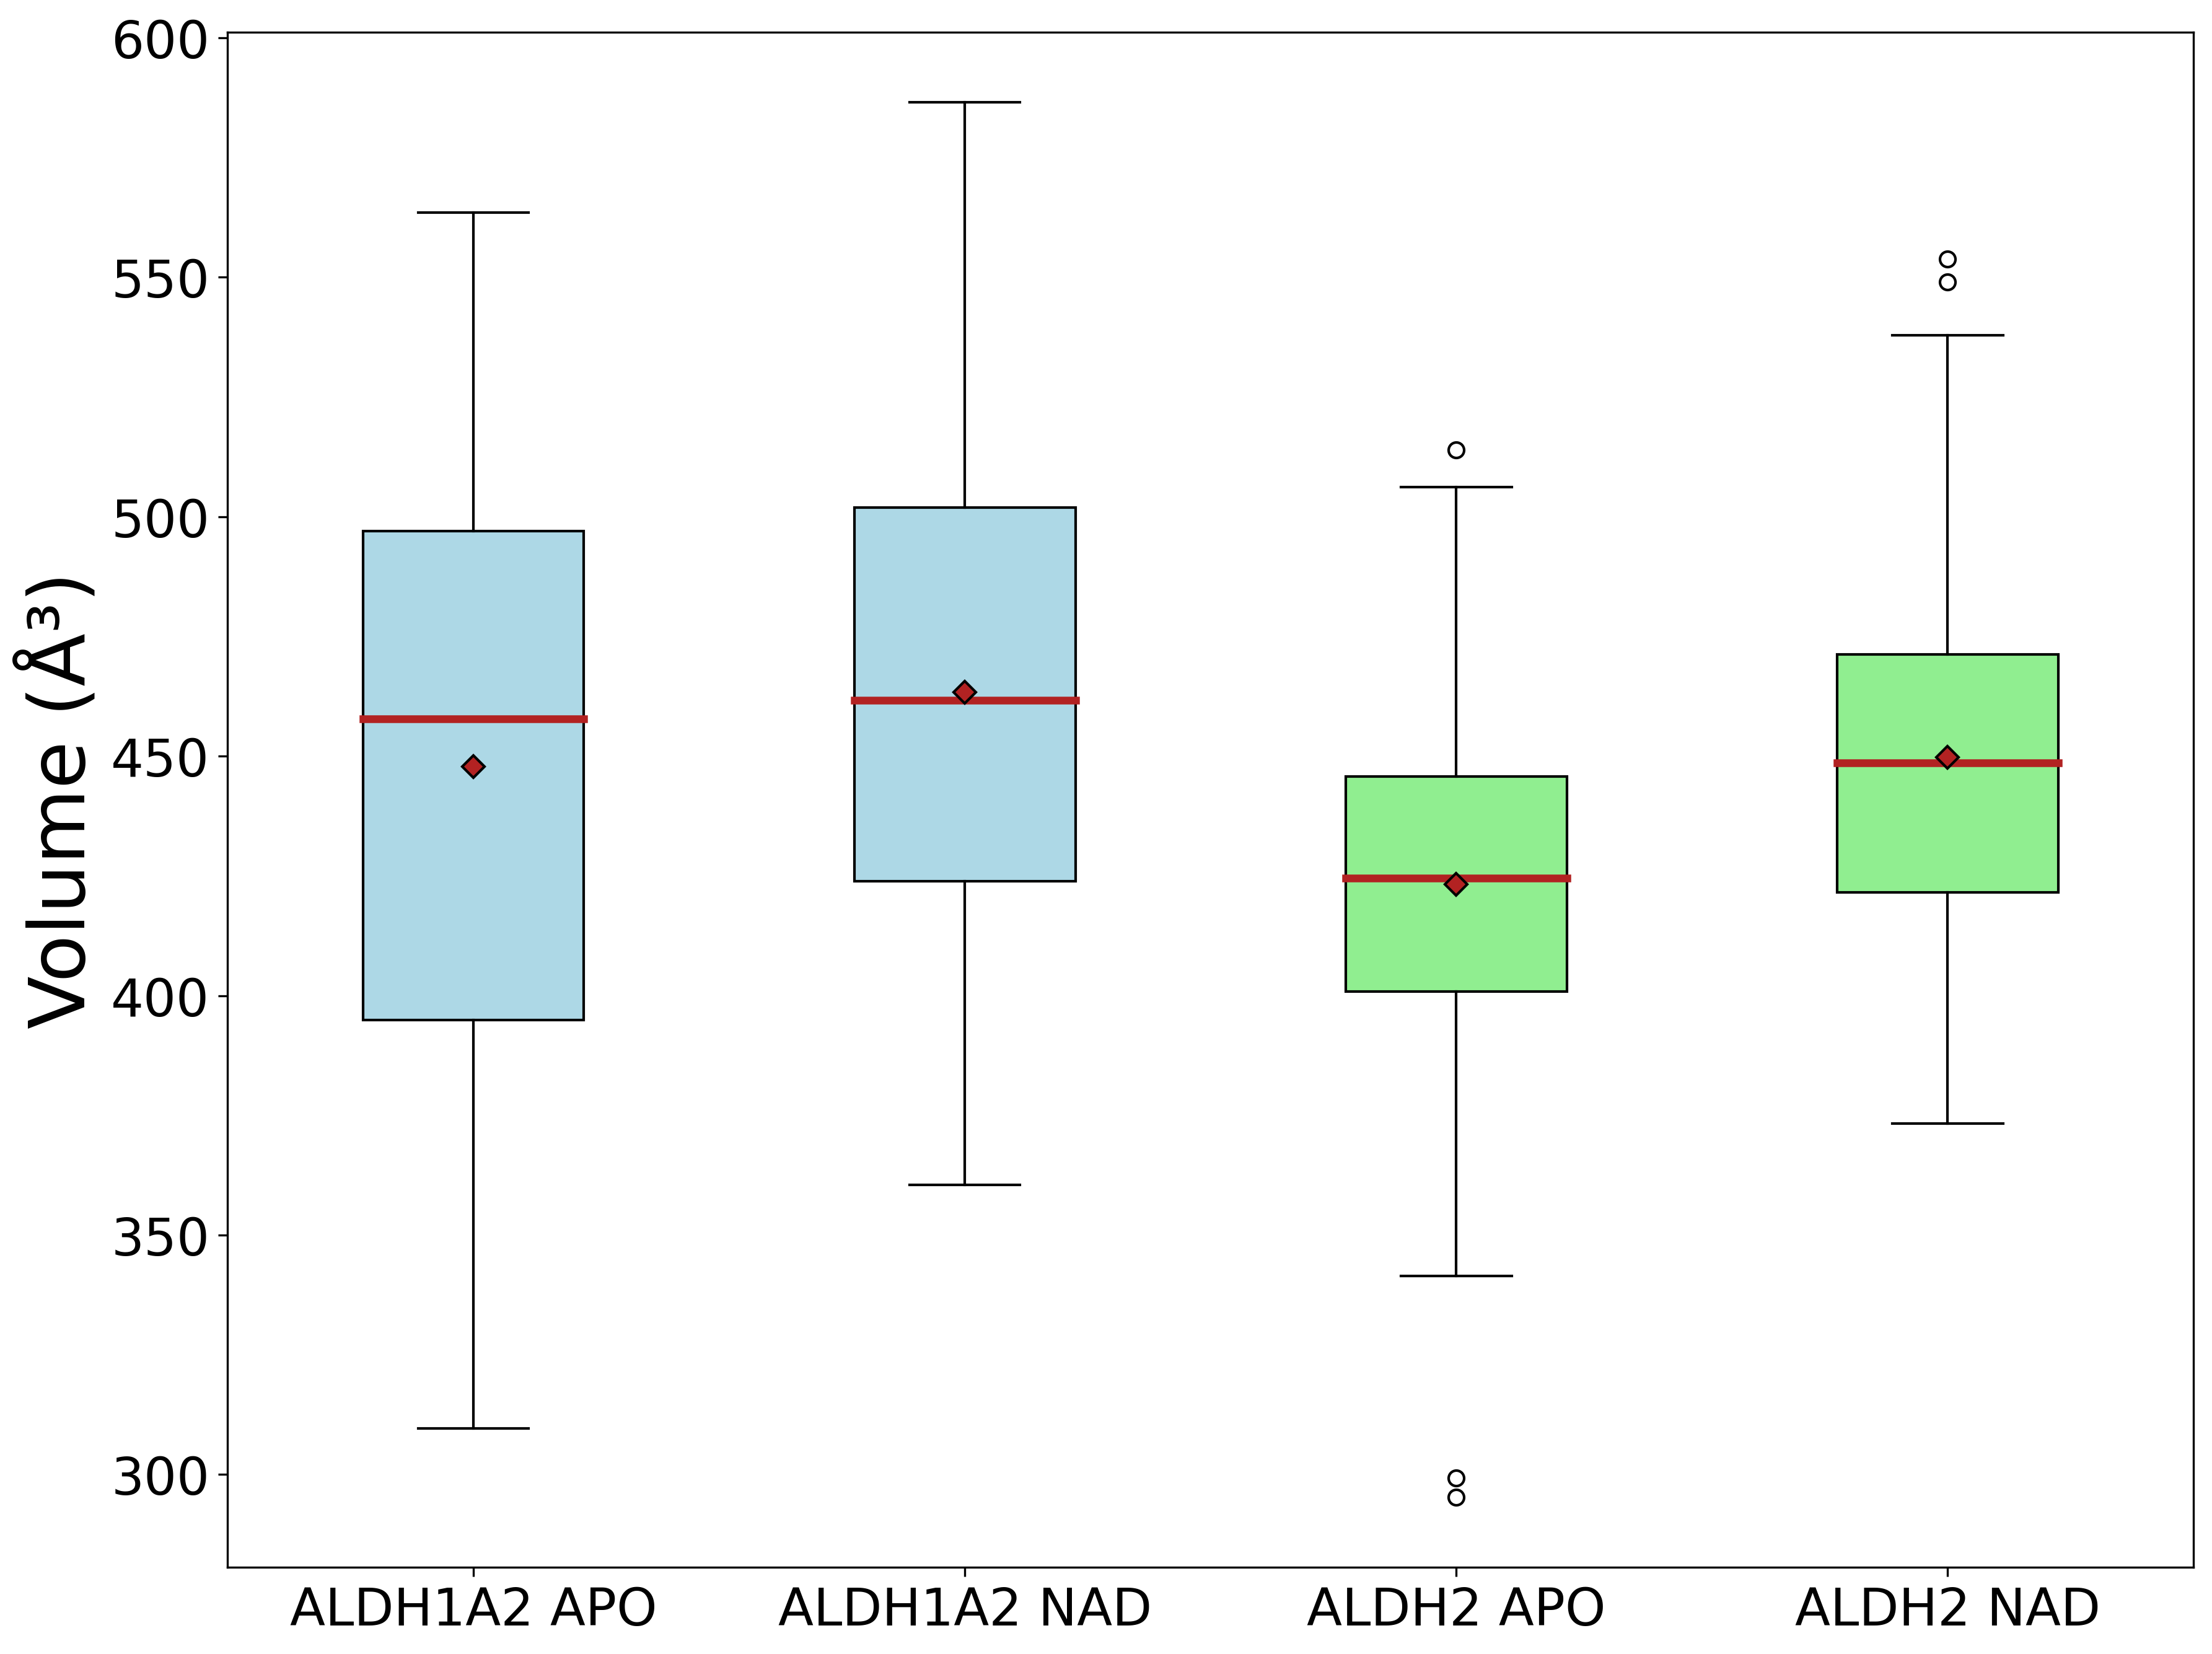

In [242]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 9), dpi=300, tight_layout=True, clear=True)

bp = ax.boxplot(
    volume.iloc[:, [0, 2, 4, 6]],
    patch_artist=True,
    showmeans=True,
    meanprops = dict(
        marker='D',
        markeredgecolor='black',
        markerfacecolor='firebrick'
    )
)

colors = ['lightblue', 'lightblue', 'lightgreen', 'lightgreen']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='firebrick', linewidth = 3)

for mean in bp['means']:
    mean.set(color ='blue')
    
plt.ylabel('Volume (Å³)', size=30)
plt.yticks(size=20)
plt.xticks(
    [1, 2, 3, 4],
    ['ALDH1A2 APO', 'ALDH1A2 NAD', 'ALDH2 APO', 'ALDH2 NAD'],
    size=20
)

# Save figure
plt.savefig('results/ALDH/MD/volume_boxplot.png')

# Show
plt.show()